This is code that goes along w/ the three 'orioles' you can see if you run this search on the O'Reilly site: https://www.safaribooksonline.com/search/?query=%22probabilistic%20programming%20from%20scratch%22.

In [52]:
import random 
import matplotlib.pyplot as plt
%matplotlib inline

# Part one

In [1]:
n_visitors_a = 100
n_conv_a = 4

n_visitors_b = 40
n_conv_b = 2

In [13]:
def estimate_conversion(n_visitors, n_conv, trial_conversion, n_estimates=5000):
    """Returns n_estimates estimates of the conversion fraction
    of a layout that received n_visitors, n_conv of which converted."""
    i = 0
    estimates = []
    while i < n_estimates:
        p = trial_conversion()
        n_sim = simulate_conversion(p, n_visitors)
        if n_conv == n_sim:
            estimates.append(p)
            i += 1
            
    return estimates

In [14]:
def trial_conversion_a():
    """A conversion percentage can be anywhere between 0.0 and 1.0."""
    return random.random()

In [15]:
def simulate_conversion(p, n_visitors):
    """Return the number of visitors who convert given the passed
    conversion fraction p."""
    outcomes = [random.random() < p for _ in range(n_visitors)]
    return sum(outcomes)

In [16]:
a_estimates = estimate_conversion(n_visitors_a,
                                  n_conv_a,
                                  trial_conversion_a)

In [17]:
len(a_estimates)

5000

(array([  0.08,   0.64,   2.92,   7.28,  11.24,  15.52,  17.56,  20.52,
         18.52,  21.44,  16.72,  14.52,  11.6 ,  10.6 ,   8.56,   6.64,
          4.4 ,   3.44,   2.24,   1.4 ,   0.96,   0.84,   0.48,   0.6 ,
          0.4 ,   0.28,   0.2 ,   0.24,   0.04,   0.04,   0.04,   0.04,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]),
 array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
         0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,
         0.08 ,  0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,
         0.12 ,  0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,
         0.16 ,  0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,
         0.2  ,  0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,
         0.24 ,  0.245]),
 <a list of 49 Patch objects>)

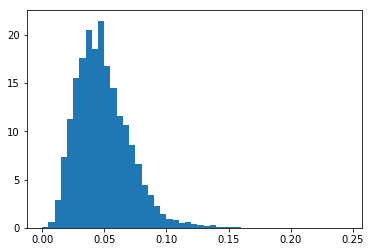

In [21]:
abbins = [i/200.0 for i in range(50)] # 50 bins between 0 and 0.25 (?)
plt.hist(a_estimates, bins=abbins, normed=True)

In [23]:
def trial_conversion_b():
    while True:
        x = random.normalvariate(mu=0.06, sigma=0.02)
        if 0 <= x <= 1:
            return x

In [24]:
trial_as = [trial_conversion_a() for _ in range(100000)]
trial_bs = [trial_conversion_b() for _ in range(100000)]

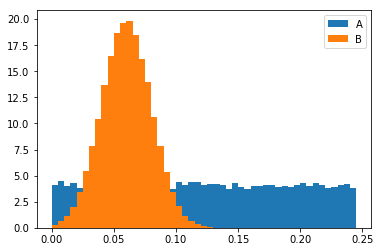

In [25]:
plt.hist(trial_as, bins=abbins, label='A', normed=True)
plt.hist(trial_bs, bins=abbins, label='B', normed=True)
plt.legend()

In [26]:
b_estimates = estimate_conversion(n_visitors_b,
                                  n_conv_b,
                                  trial_conversion_b)

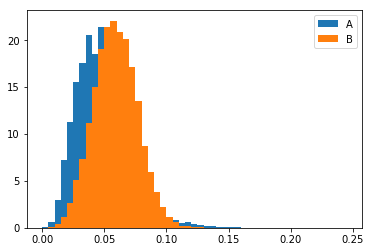

In [27]:
plt.hist(a_estimates, bins=abbins, label='A', normed=True)
plt.hist(b_estimates, bins=abbins, label='B', normed=True)
plt.legend()

In [28]:
b_better = [b > a for a, b in zip(a_estimates, b_estimates)]
sum(b_better) / len(a_estimates)

0.6656

# Part two

See the pages.

# Part three

See the pages for the initial stuff before the German tank problem.

## German tank problem

First define abayes and take here since we haven't done all of the work above.

In [67]:
import itertools

def abayes(data, prior_sampler, simulate, compare):
    for p in prior_sampler:
        if compare(simulate(p), data):
            yield p
            
def take(n, iterable):
    """Return first n items of the iterable as a list."""
    return list(itertools.islice(iterable, n))

In [29]:
captured_tank_serial_nums = [314, 421]

In [30]:
def prior_ntanks_sampler(captured_tank_serial_nums, upper=5000):
    while True:
        yield random.randint(max(captured_tank_serial_nums), upper)

In [31]:
def simulate_tanks(n_tanks, n_caught):
    """Return serial numbers of n_caught tanks, assuming there are
    a total of n_tanks."""
    return random.sample(range(n_tanks), n_caught)

In [86]:
def compare_tanks(obs1, obs2, tol=10):
    """Return true if two sets of serial numbers agree within the 
    specified tolerance. Looks like it returns true as long as each
    comparison of serial numbers are within, by default, 20 numbers - 
    i.e., serial numbers 20 and 40 'match' but 20 and 41 don't."""
    return all(abs(o1 - o2) <= tol for o1, o2 in zip(sorted(obs1), sorted(obs2)))

In [87]:
posterior_ntanks_sampler = abayes(captured_tank_serial_nums,
                                  prior_ntanks_sampler(captured_tank_serial_nums),
                                  lambda n_tanks: simulate_tanks(n_tanks, len(captured_tank_serial_nums)), 
                                  compare_tanks)
                                  
tank_samples = take(1000, posterior_ntanks_sampler)

In [88]:
posterior_ntanks_sampler = abayes(
    captured_tank_serial_nums,
    prior_ntanks_sampler(captured_tank_serial_nums),
    lambda n_tanks: simulate_tanks(n_tanks, len(captured_tank_serial_nums)),
    compare_tanks)

tank_samples = take(10000, posterior_ntanks_sampler)

In [89]:
# analytic solution
from math import factorial

def binom(x, y):
    """Return binomial coef for x, y."""
    return factorial(x) // (factorial(y) * factorial(x - y))

def analytic_solution(n_tanks, captured_tank_serial_nums):
    """Probability that there are n_tanks given a list of captured
    serial numbers."""
    k = len(captured_tank_serial_nums)
    if k < 2:
        raise ValueError("Analytic formaul valid only for len(serialnums) >= 2.")
        
    m = max(captured_tank_serial_nums)
    if n_tanks < m:
        return 0.0
    else:
        return (k - 1) / k * binom(m - 1, k - 1) / binom(n_tanks, k)

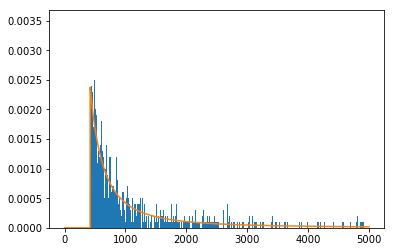

In [90]:
tank_bins = range(0, 5000)
plt.hist(tank_samples, normed=True, bins=tank_bins)
plt.plot(tank_bins, [analytic_solution(x, captured_tank_serial_nums) for x in tank_bins])

In [80]:
from pymc3 import DiscreteUniform, Model, sample

In [84]:
with Model():
    n_tanks = DiscreteUniform('n_tanks', 
                              lower = max(captured_tank_serial_nums),
                              upper = 5000)
    obs = DiscreteUniform('obs', lower = 0, upper = n_tanks,
                          observed = captured_tank_serial_nums)
    
    trace = sample(100000)

Assigned Metropolis to n_tanks
100%|██████████| 10000/10000 [00:01<00:00, 8430.51it/s]


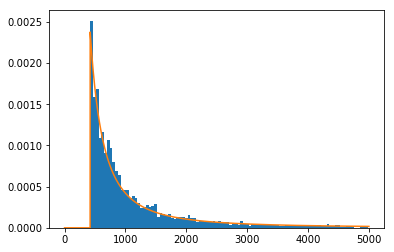

In [85]:
burn_in = 1000
plt.hist(trace[burn_in:].get_values('n_tanks'), normed=True, bins=100)
plt.plot(tank_bins, [analytic_solution(x, captured_tank_serial_nums) for x in tank_bins])